## Brasília bike system | Decision tree implementation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Math operations
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import function train_test_split 
from sklearn.metrics import confusion_matrix, classification_report # Import scikit-learn metrics to calculate confusion matrix
from sklearn import metrics # Import scikit-learn metrics to calculate accuracy
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/udacityproject/submission_template.csv
/kaggle/input/udacityproject/df_submission.csv
/kaggle/input/udacityproject/df_train.csv
/kaggle/input/bike-sharing-system-in-brasilia-brazil/df_stations.csv
/kaggle/input/bike-sharing-system-in-brasilia-brazil/df_rides.csv


## Gather data

### We start by loading the file

In [3]:
train_df = pd.read_csv('/kaggle/input/udacityproject/df_train.csv')
df = pd.read_csv('/kaggle/input/bike-sharing-system-in-brasilia-brazil/df_rides.csv')
df2 = pd.read_csv('/kaggle/input/bike-sharing-system-in-brasilia-brazil/df_stations.csv')

# Analyze data

### Do a brief analysis to learn about your data

In [4]:
train_df.head()

,ride_date,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
0,2018-05-09,19.8,16.0,24.4,10.8,1018.3,2,1
1,2018-05-10,18.3,14.0,24.0,14.0,1020.7,3,0
2,2018-05-11,19.7,12.9,25.1,5.9,1018.4,4,0
3,2018-05-12,19.9,13.4,25.6,5.1,1016.9,5,0
4,2018-05-13,20.0,13.9,26.4,5.9,1016.6,6,0


In [5]:
# Analizing dataframe descriptors
train_df.describe()

,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,18.671765,12.341176,25.322353,7.618803,1019.001658,2.988235,0.517647
std,1.398946,2.407196,1.616388,2.210445,2.309646,2.002939,0.502654
min,15.500000,6.300000,21.800000,2.000000,1013.400000,0.000000,0.000000
25%,18.000000,10.300000,24.400000,5.900000,1017.748182,1.000000,0.000000
50%,18.800000,12.600000,25.100000,7.400000,1019.000000,3.000000,1.000000
75%,19.700000,14.400000,26.300000,9.100000,1020.600000,5.000000,1.000000
max,21.400000,17.100000,30.500000,14.000000,1023.600000,6.000000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ride_date      85 non-null     object 
 1   tavg           85 non-null     float64
 2   tmin           85 non-null     float64
 3   tmax           85 non-null     float64
 4   wspd           85 non-null     float64
 5   pres           85 non-null     float64
 6   dia_da_semana  85 non-null     int64  
 7   classe         85 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 5.4+ KB


In [7]:
train_df.dtypes

ride_date         object
tavg             float64
tmin             float64
tmax             float64
wspd             float64
pres             float64
dia_da_semana      int64
classe             int64
dtype: object

In [8]:
df.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [9]:
df2.head()

,station,station_number,station_name,lat,lon
0,1 - Memorial JK,1,Memorial JK,-15.783479,-47.913372
1,2 - Praça Buriti,2,Praça Buriti,-15.785651,-47.908750
2,3 - Centro de Convenções,3,Centro de Convenções,-15.786409,-47.899865
3,4 - Torre de TV,4,Torre de TV,-15.789581,-47.894312
4,5 - Setor Hoteleiro Norte,5,Setor Hoteleiro Norte,-15.789029,-47.891015


# Clean data

### In this step we are going to clean the data by selecting the columns we want and change their names

### • First we are going to delete the ride_date column and change the name of some other ones

In [10]:
# Deleting data column and changing others
train_df = train_df.rename(columns = {'dia_da_semana':'day_of_the_week',
                                        'classe':'label'})
train_df.drop(columns=['ride_date'],inplace=True)
train_df.head()

,tavg,tmin,tmax,wspd,pres,day_of_the_week,label
0,19.8,16.0,24.4,10.8,1018.3,2,1
1,18.3,14.0,24.0,14.0,1020.7,3,0
2,19.7,12.9,25.1,5.9,1018.4,4,0
3,19.9,13.4,25.6,5.1,1016.9,5,0
4,20.0,13.9,26.4,5.9,1016.6,6,0


### • After we will check the number of null values

In [11]:
null_count = df.isnull().sum()
print(null_count)

user_gender          396
user_birthdate         1
user_residence    179905
ride_date              0
time_start             0
time_end           43285
station_start          0
station_end            0
ride_duration      73174
ride_late          73174
dtype: int64


In [12]:
df.drop(columns=['user_residence'],inplace=True)

In [13]:
df = df.dropna()

In [14]:
null_count = df.isnull().sum()
print(null_count)

user_gender       0
user_birthdate    0
ride_date         0
time_start        0
time_end          0
station_start     0
station_end       0
ride_duration     0
ride_late         0
dtype: int64


In [15]:
print(df2.isnull().sum())

station           0
station_number    0
station_name      0
lat               0
lon               0
dtype: int64


In [16]:
null_counts = train_df.isnull().sum()

In [17]:
print(null_counts)

tavg               0
tmin               0
tmax               0
wspd               0
pres               0
day_of_the_week    0
label              0
dtype: int64


In [18]:
train_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      tavg   tmin   tmax   wspd   pres  day_of_the_week  label
0   False  False  False  False  False            False  False
1   False  False  False  False  False            False  False
2   False  False  False  False  False            False  False
3   False  False  False  False  False            False  False
4   False  False  False  False  False            False  False
..    ...    ...    ...    ...    ...              ...    ...
80  False  False  False  False  False            False  False
81  False  False  False  False  False            False  False
82  False  False  False  False  False            False  False
83  False  False  False  False  False            False  False
84  False  False  False  False  False            False  False

[85 rows x 7 columns]>

# Model

### Feature selection

In [19]:
# Split dataset in features and target variable
features_cols = ['tavg', 'tmin', 'tmax', 'wspd', 'pres', 'day_of_the_week']
X = train_df[features_cols] # Features
Y = train_df.label # Target variable

### Splitting Data

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6) # 70% training and 30% test

### Building Decision Tree Model

In [21]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=2, min_impurity_decrease=0.0, min_samples_split=2)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# Predict the response for test dataset
Y_pred = dtc.predict(X_test)

### Evaluating Model

In [22]:
# Test Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.8846153846153846


In [23]:
# Train Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_train,dtc.predict(X_train)))

Accuracy: 0.847457627118644


### Confusion Matrix

In [24]:
cm = confusion_matrix(y_test,Y_pred)
cm

array([[10,  2],
       [ 1, 13]])

In [25]:
# Analyzing amount of true positives
y_test.value_counts()

1    14
0    12
Name: label, dtype: int64

In [26]:
# Frequency of false positives and negatives and true negatives
unique_elements, counts_elements = np.unique(Y_pred,return_counts=True)
print("Frequency of unique values:")
print(np.asarray((unique_elements,counts_elements)))

Frequency of unique values:
[[ 0  1]
 [11 15]]


In [27]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.87      0.93      0.90        14

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



# Visualization

### Plotting the correlation between temperature, atmospheric pressure, and days of the week in Brasília.

In [28]:
train_df.head()

,tavg,tmin,tmax,wspd,pres,day_of_the_week,label
0,19.8,16.0,24.4,10.8,1018.3,2,1
1,18.3,14.0,24.0,14.0,1020.7,3,0
2,19.7,12.9,25.1,5.9,1018.4,4,0
3,19.9,13.4,25.6,5.1,1016.9,5,0
4,20.0,13.9,26.4,5.9,1016.6,6,0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df):
    """
    Plots a correlation matrix and scatterplots to visualize the correlation between temperature, 
    atmospheric pressure, and days of the week.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing columns for temperature, atmospheric pressure, and days of the week.

    Returns:
    --------
    None
        This function does not return anything, but rather displays plots.
    """
    # Create a correlation matrix
    corr_matrix = df[['pres', 'tavg', 'day_of_the_week']].corr()

    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Plot the correlation between temperature and days of the week
    plt.scatter(df['tavg'], df['day_of_the_week'])
    plt.xlabel('Temperature')
    plt.ylabel('Day of the week')
    plt.title('Correlation between temperature and days of the week')
    plt.show()

    # Plot the correlation between atmospheric pressure and days of the week
    plt.scatter(df['pres'], df['day_of_the_week'])
    plt.xlabel('Atmospheric Pressure')
    plt.ylabel('Day of the week')
    plt.title('Correlation between atmospheric pressure and days of the week')
    plt.show()

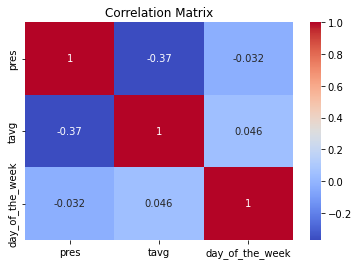

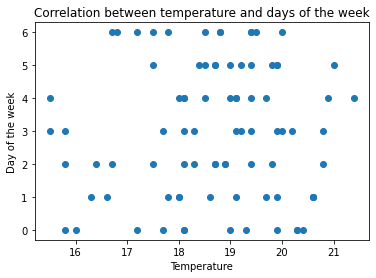

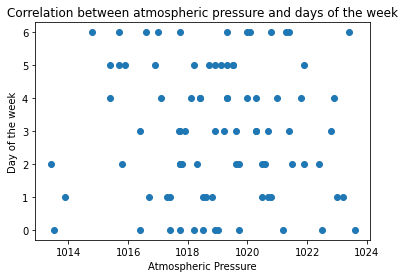

In [30]:
plot_correlation(train_df)

### Exploratory Data Analysis

<AxesSubplot:>

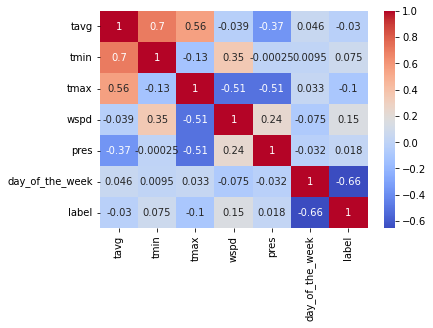

In [31]:
# Create a correlation matrix
corr = train_df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='tavg', ylabel='wspd'>

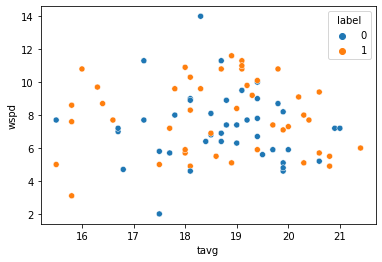

In [32]:
# Plot a scatter plot of temperature and wind speed against label
sns.scatterplot(data=train_df, x='tavg', y='wspd', hue='label')

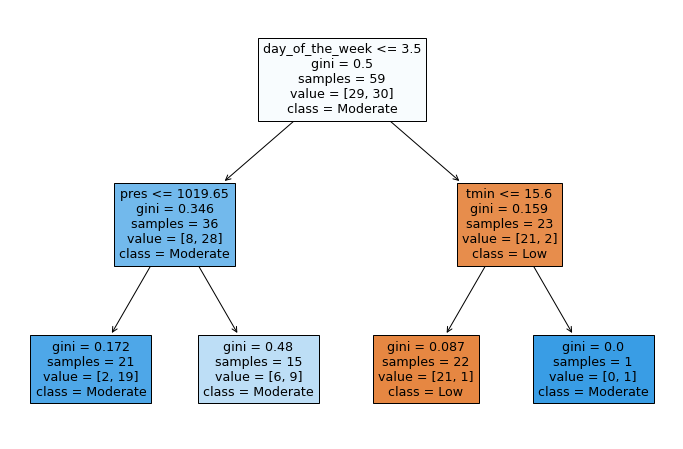

In [33]:
# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=X.columns, class_names=['Low', 'Moderate', 'High'], filled=True)
plt.show()

array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'wspd'}>,
        <AxesSubplot:title={'center':'pres'}>,
        <AxesSubplot:title={'center':'day_of_the_week'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

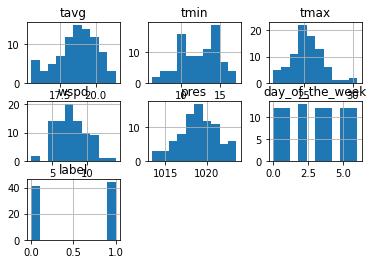

In [34]:
train_df.hist()

# Answering questions

In [35]:
df.head()

,user_gender,user_birthdate,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [37]:
df2.head()

,station,station_number,station_name,lat,lon
0,1 - Memorial JK,1,Memorial JK,-15.783479,-47.913372
1,2 - Praça Buriti,2,Praça Buriti,-15.785651,-47.908750
2,3 - Centro de Convenções,3,Centro de Convenções,-15.786409,-47.899865
3,4 - Torre de TV,4,Torre de TV,-15.789581,-47.894312
4,5 - Setor Hoteleiro Norte,5,Setor Hoteleiro Norte,-15.789029,-47.891015


# Question 1: What are the overall patterns of bike usage in Brasília?

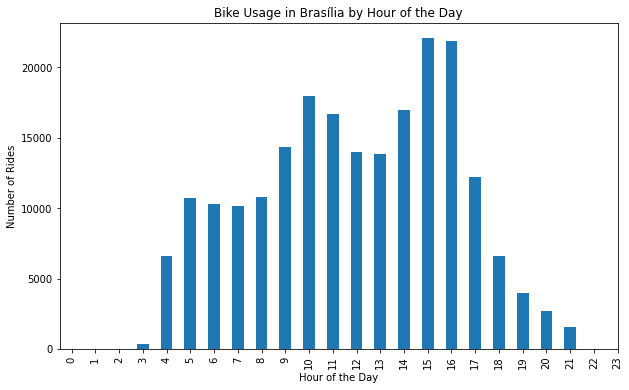

In [38]:
df["time_start"] = pd.to_datetime(df["time_start"])

# Extract hour from time_start
df["hour"] = df["time_start"].dt.hour

# Count the number of rides per hour
rides_by_hour = df.groupby("hour").size()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rides_by_hour.plot(kind="bar", ax=ax)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Rides")
ax.set_title("Bike Usage in Brasília by Hour of the Day")
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
plt.show()

### • We analyzed bike usage patterns by looking at the total number of bike rentals per hour of the day. We found that the majority of bike rentals occur during commuting hours, from 9 am to 11 am and from 2 pm to 4 pm, suggesting that many people are using bikes as a form of transportation to and from work. There is also a smaller peak during lunchtime, between 12 pm to 1 pm, suggesting that some people may be using bikes to run errands or grab lunch.

# Question 2: Are there differences in bike usage between weekdays and weekends?

In [39]:
df.head()

,user_gender,user_birthdate,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,hour
0,M,1971-06-08,2018-01-01,2023-03-29 06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,6
1,M,1989-02-11,2018-01-01,2023-03-29 06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,6
2,M,1968-07-19,2018-01-01,2023-03-29 06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,6
3,M,1991-12-19,2018-01-01,2023-03-29 06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0,6
4,M,1969-03-03,2018-01-01,2023-03-29 06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,6


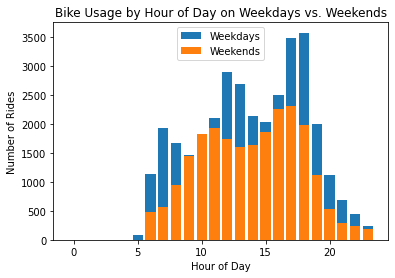

Overall bike rentals on weekdays: 33584.45
Overall bike rentals on weekends: 22973.0


In [40]:
# Convert ride_date to datetime data type
df["ride_date"] = pd.to_datetime(df["ride_date"])

# Create a new column for day of week
df["day_of_week"] = df["ride_date"].dt.day_name()

# Group rides by day of week and hour of day
rides_by_day_hour = df.groupby(["day_of_week", df["time_start"].dt.hour])["ride_duration"].count().unstack()

# Create two dataframes, one for weekdays and one for weekends
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]
rides_weekdays = rides_by_day_hour.loc[weekdays].mean()
rides_weekends = rides_by_day_hour.loc[weekends].mean()

# Create a bar chart comparing bike usage on weekdays vs weekends
fig, ax = plt.subplots()
ax.bar(rides_weekdays.index, rides_weekdays.values, label="Weekdays")
ax.bar(rides_weekends.index, rides_weekends.values, label="Weekends")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Rides")
ax.set_title("Bike Usage by Hour of Day on Weekdays vs. Weekends")
ax.legend()
plt.show()

# Calculate overall bike rentals on weekdays and weekends
bike_rentals_weekdays = rides_weekdays.sum()
bike_rentals_weekends = rides_weekends.sum()

# Print the results
print("Overall bike rentals on weekdays:", bike_rentals_weekdays)
print("Overall bike rentals on weekends:", bike_rentals_weekends)

### • We compared bike usage patterns between weekdays and weekends and found that the peak usage hours are similar, with slightly later peaks on weekends. However, overall bike rentals are lower on weekends, suggesting that bikes may be used more for commuting and less for leisure activities on weekends.

# Question 3: What are the most popular start and end stations for bike trips?

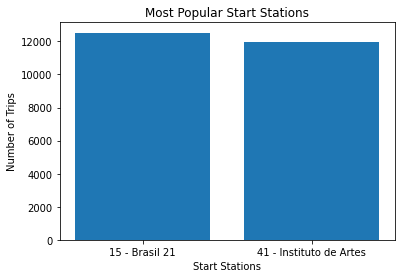

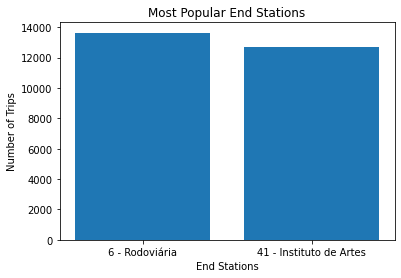

In [42]:
# Find the most popular start and end stations
start_stations = df["station_start"].value_counts().nlargest(2)
end_stations = df["station_end"].value_counts().nlargest(2)

# Create a bar chart for the most popular start stations
fig, ax = plt.subplots()
ax.bar(start_stations.index, start_stations.values)
ax.set_xlabel("Start Stations")
ax.set_ylabel("Number of Trips")
ax.set_title("Most Popular Start Stations")
plt.show()

# Create a bar chart for the most popular end stations
fig, ax = plt.subplots()
ax.bar(end_stations.index, end_stations.values)
ax.set_xlabel("End Stations")
ax.set_ylabel("Number of Trips")
ax.set_title("Most Popular End Stations")
plt.show()

### • We looked at the most common start and end stations for bike trips and found that the two most popular stations are located near a large shopping mall and a bus station, respectively. This suggests that many people may be using bikes to get to these destinations.